<a href="https://colab.research.google.com/github/jantoniohergut/ActividadesUNITEC/blob/main/CVD_Entrega01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis

Las visualizaciones proporcionan varias perspectivas sobre los datos de la población mundial. Por ejemplo, el gráfico de barras de los segmentos de crecimiento nos permite ver que la mayoría de los países tienen un crecimiento medio-bajo.

El diagrama de caja de las tasas de crecimiento por continente muestra que África tiene la tasa de crecimiento más alta, mientras que Europa tiene la más baja. Esto sugiere que las tasas de crecimiento pueden variar significativamente entre los continentes.

El gráfico de dispersión de la densidad de población versus la tasa de crecimiento revela que no hay una correlación clara entre estos dos factores.

Finalmente, el gráfico de burbujas para los países con crecimiento alto muestra que la mayoría de estos países están en África.

## Conclusión

A partir de este análisis, podemos concluir que hay una gran variación en las tasas de crecimiento y las densidades de población en todo el mundo. África tiene la tasa de crecimiento más alta, mientras que Europa tiene la más baja. No parece haber una correlación clara entre la densidad de población y la tasa de crecimiento.


Saving world_pop.csv to world_pop.csv


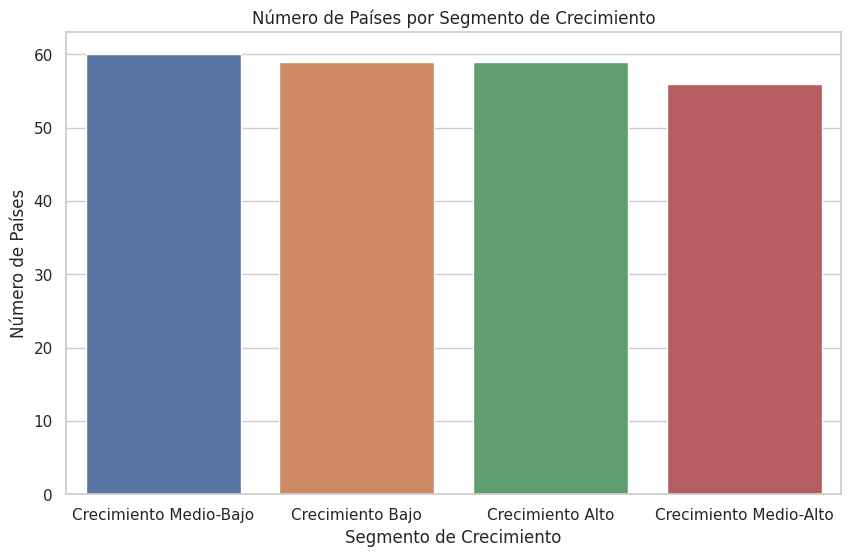

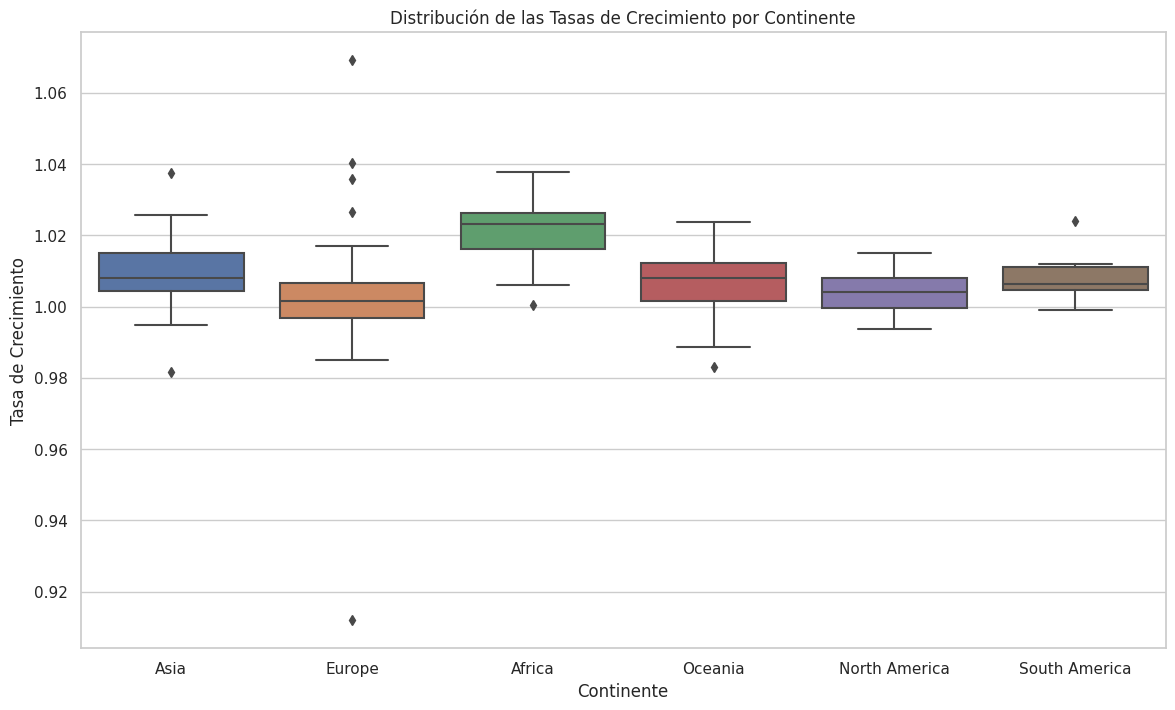

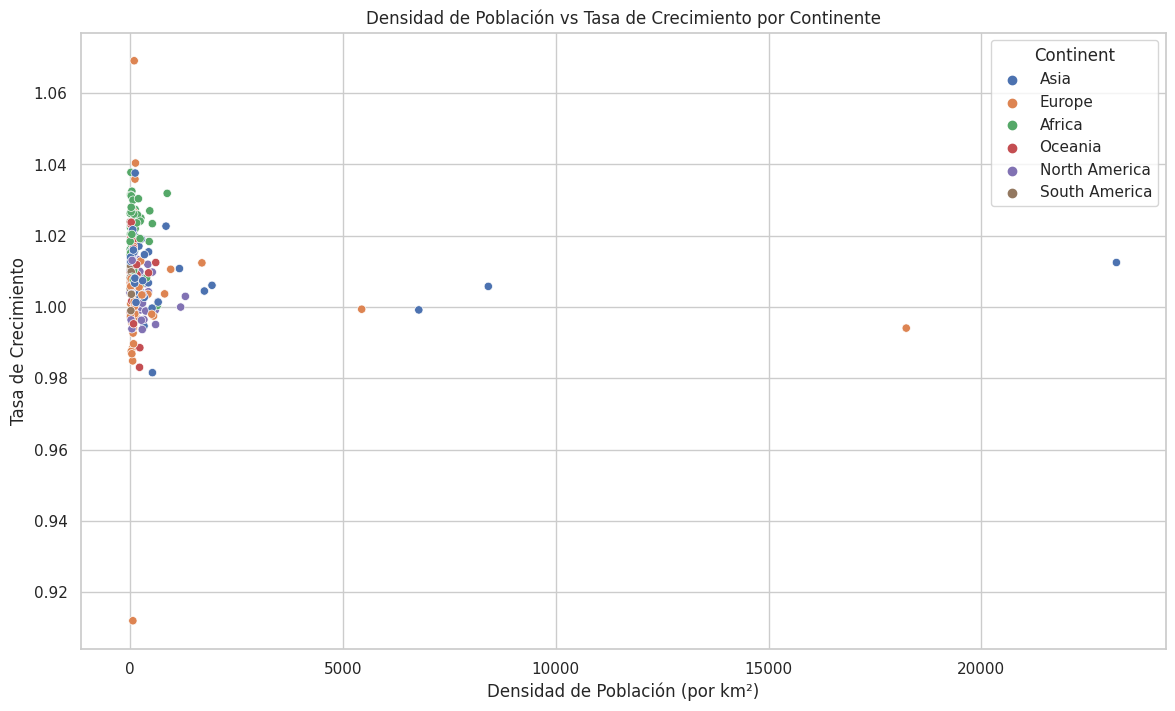

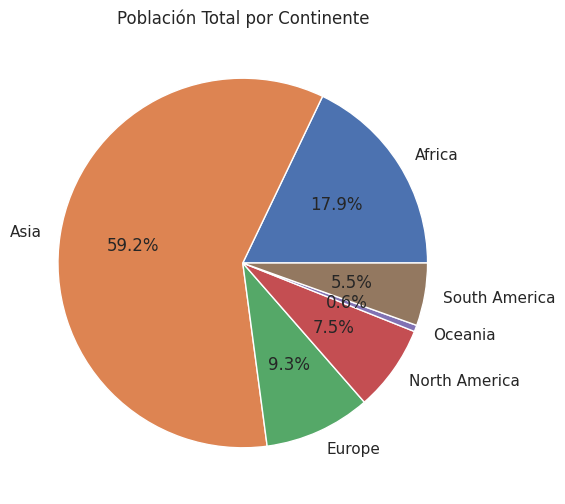

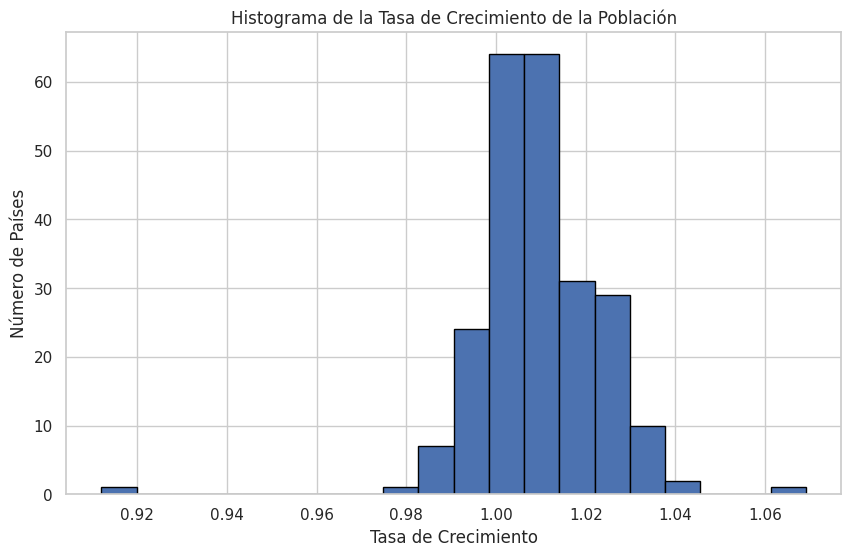

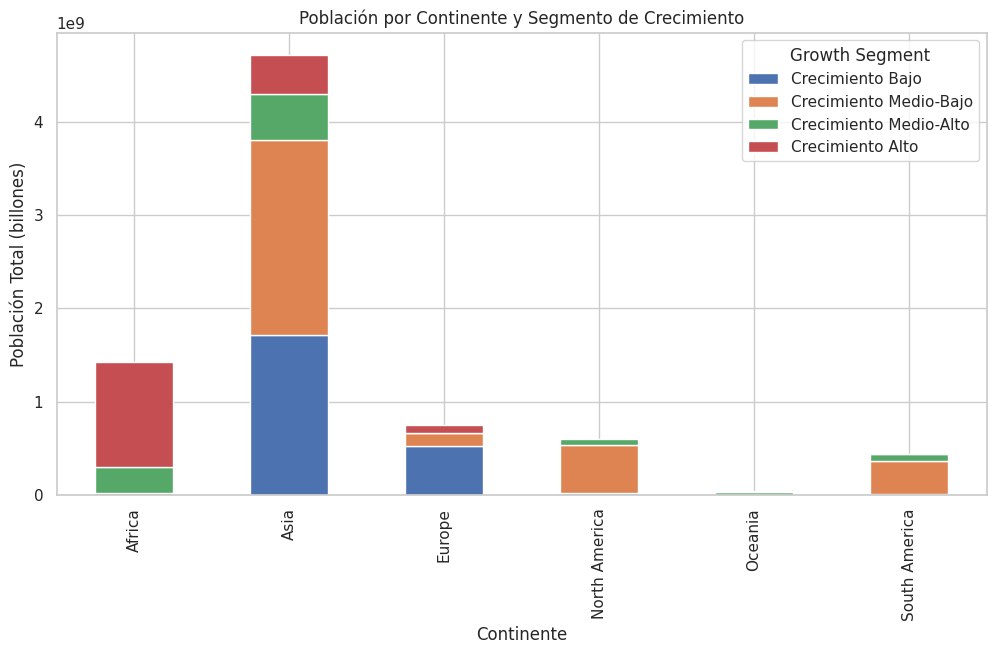

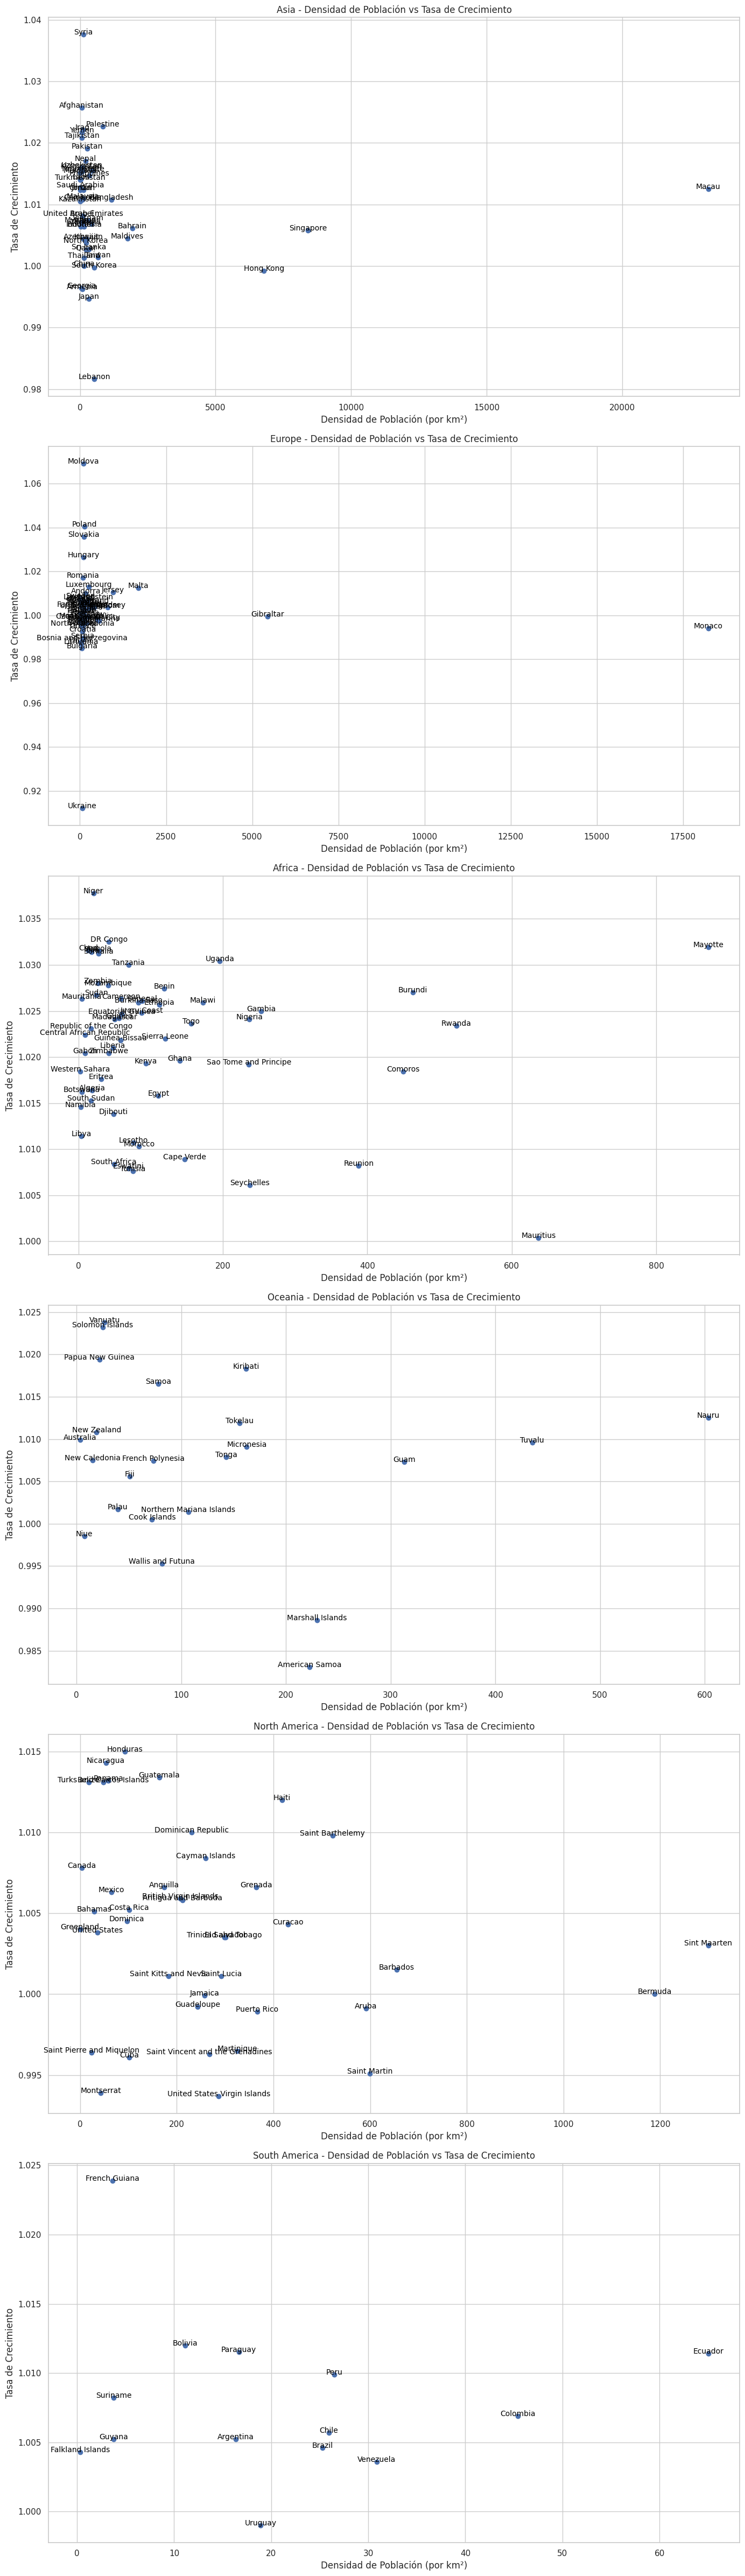

In [1]:
# Importando las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# Cargando los datos
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['world_pop.csv']))

# Creando los segmentos de crecimiento
bins = [0, 1.001775, 1.007900, 1.016950, df['Growth Rate'].max()]
labels = ['Crecimiento Bajo', 'Crecimiento Medio-Bajo', 'Crecimiento Medio-Alto', 'Crecimiento Alto']
# Añadiendo una nueva columna al DataFrame para los segmentos de crecimiento
df['Growth Segment'] = pd.cut(df['Growth Rate'], bins=bins, labels=labels)

# Configurando el estilo de seaborn
sns.set(style="whitegrid")

# Creando un gráfico de barras para los Segmentos de Crecimiento
plt.figure(figsize=(10,6))
sns.countplot(x='Growth Segment', data=df, order = df['Growth Segment'].value_counts().index)
plt.title('Número de Países por Segmento de Crecimiento')
plt.xlabel('Segmento de Crecimiento')
plt.ylabel('Número de Países')
plt.show()

# Creando un diagrama de caja para el Crecimiento de la Población por Continente
plt.figure(figsize=(14,8))
sns.boxplot(x='Continent', y='Growth Rate', data=df)
plt.title('Distribución de las Tasas de Crecimiento por Continente')
plt.xlabel('Continente')
plt.ylabel('Tasa de Crecimiento')
plt.show()

# Creando un gráfico de dispersión para la Densidad de Población vs Tasa de Crecimiento
plt.figure(figsize=(14,8))
sns.scatterplot(x='Density (per km²)', y='Growth Rate', hue='Continent', data=df)
plt.title('Densidad de Población vs Tasa de Crecimiento por Continente')
plt.xlabel('Densidad de Población (por km²)')
plt.ylabel('Tasa de Crecimiento')
plt.show()

# Filtrando los países con alta tasa de crecimiento
high_growth_df = df[df['Growth Segment'] == 'Crecimiento Alto']

# Ajustando el tamaño de la burbuja de acuerdo a la Población 2022 (a escala)
bubble_size = high_growth_df['2022 Population'] / 1000000

# Gráfico de pastel de la población total por continente
continent_populations = df.groupby('Continent')['2022 Population'].sum()
plt.figure(figsize=(10,6))
plt.pie(continent_populations, labels=continent_populations.index, autopct='%1.1f%%')
plt.title('Población Total por Continente')
plt.show()

# Histograma de la tasa de crecimiento de la población
plt.figure(figsize=(10,6))
plt.hist(df['Growth Rate'], bins=20, edgecolor='black')
plt.title('Histograma de la Tasa de Crecimiento de la Población')
plt.xlabel('Tasa de Crecimiento')
plt.ylabel('Número de Países')
plt.show()

# Gráfico de barras apiladas de la población por continente y segmento de crecimiento
stacked_bar_data = df.groupby(['Continent', 'Growth Segment'])['2022 Population'].sum().unstack()
stacked_bar_data.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Población por Continente y Segmento de Crecimiento')
plt.xlabel('Continente')
plt.ylabel('Población Total (billones)')
plt.show()

# Creando gráficos para cada continente
continents = df['Continent'].unique()

# Creando un subplot para cada continente
fig, axs = plt.subplots(nrows=len(continents), ncols=1, figsize=(14, 8*len(continents)))

for idx, continent in enumerate(continents):
    # Datos para el continente actual
    continent_df = df[df['Continent'] == continent]

    # Gráfico de dispersión para la Densidad de Población vs Tasa de Crecimiento
    axs[idx].scatter(x='Density (per km²)', y='Growth Rate', data=continent_df)
    axs[idx].set_title(f'{continent} - Densidad de Población vs Tasa de Crecimiento')
    axs[idx].set_xlabel('Densidad de Población (por km²)')
    axs[idx].set_ylabel('Tasa de Crecimiento')

    # Añadiendo nombres de los países a las burbujas
    for line in range(0, continent_df.shape[0]):
        axs[idx].text(continent_df['Density (per km²)'].iloc[line], continent_df['Growth Rate'].iloc[line],
                 continent_df['Country/Territory'].iloc[line], horizontalalignment='center',
                 size='small', color='black')

plt.tight_layout()
plt.show()


## Análisis

Las visualizaciones proporcionan varias perspectivas sobre los datos de la población mundial. Por ejemplo, el gráfico de barras de los segmentos de crecimiento nos permite ver que la mayoría de los países tienen un crecimiento medio-bajo.

El diagrama de caja de las tasas de crecimiento por continente muestra que África tiene la tasa de crecimiento más alta, mientras que Europa tiene la más baja. Esto sugiere que las tasas de crecimiento pueden variar significativamente entre los continentes.

El gráfico de dispersión de la densidad de población versus la tasa de crecimiento revela que no hay una correlación clara entre estos dos factores.

Finalmente, el gráfico de burbujas para los países con crecimiento alto muestra que la mayoría de estos países están en África.

## Conclusión

A partir de este análisis, podemos concluir que hay una gran variación en las tasas de crecimiento y las densidades de población en todo el mundo. África tiene la tasa de crecimiento más alta, mientras que Europa tiene la más baja. No parece haber una correlación clara entre la densidad de población y la tasa de crecimiento.
